## PM4Py Demo

Python library for all types of process mining tasks.

More information in the [official documentation](https://processintelligence.solutions/static/api/2.7.11/pm4py.html).

### Import of PM4Py Library

In [1]:
# Necessary imports for the remainder of the notebook
import pm4py
import pm4py.objects.petri_net.importer
import pandas as pd

pd.options.mode.chained_assignment = None  # default='warn', suppress warnings when importing logs from https://www.ocel-standard.org/event-logs/

### Importing the event log

In [2]:
ocel = pm4py.read_ocel2_sqlite("./order-management.sqlite")

/Users/yuyang/Documents/课件/BPDI/Thesis/edx course/subtitle/.venv/lib/python3.12/site-packages/pm4py/objects/ocel/importer/sqlite/variants/ocel20.py:98: UserWarning: There are unsatisfied OCEL 2.0 constraints in the given relational database: ['const_14_primary_key_object_event_map_type_tables', 'const_15_primary_key_object_event_tables', 'const_16_primary_key_event_object_table', 'const_17_primary_key_object_object_table', 'const_18_primary_key_event_type_spec_tables', 'const_19_foreign_key_event', 'const_20_foreign_key_object', 'const_21_foreign_key_event_object', 'const_22_foreign_key_object_object', 'const_23_foreign_key_event_type_specific', 'const_24_foreign_key_object_type_specific']
  warnings.warn(


### General overview:

In [3]:
print(ocel)

Object-Centric Event Log (number of events: 21008, number of objects: 10840, number of activities: 11, number of object types: 6, events-objects relationships: 147463)
Activities occurrences: Counter({'pick item': 7659, 'place order': 2000, 'confirm order': 2000, 'pay order': 2000, 'item out of stock': 1544, 'reorder item': 1544, 'create package': 1128, 'send package': 1128, 'package delivered': 1128, 'payment reminder': 566, 'failed delivery': 311})
Object types occurrences (number of objects): Counter({'items': 7659, 'orders': 2000, 'packages': 1128, 'products': 20, 'employees': 18, 'customers': 15})
Unique activities per object type: Counter({'items': 11, 'products': 11, 'employees': 8, 'orders': 4, 'packages': 4, 'customers': 2})
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


### Investigate Objects and Events

In [4]:
items = ocel.objects[ocel.objects['ocel:type'] == 'items']

cheapest_item = items[items['price'] == items['price'].min()]
most_expensive_item = items[items['price'] == items['price'].max()]

cheapest_item_name = cheapest_item.iloc[0]['ocel:oid']
cheapest_item_price = cheapest_item.iloc[0]['price']

most_expensive_item_name = most_expensive_item.iloc[0]['ocel:oid']
most_expensive_item_price = most_expensive_item.iloc[0]['price']

print(f'The cheapest item is {cheapest_item_name} at a price of {cheapest_item_price} USD.\n')
print(f'The most expensive item is {most_expensive_item_name} at a price of {most_expensive_item_price} USD.\n')

The cheapest item is i-880020 at a price of 29.99 USD.

The most expensive item is i-886566 at a price of 2946.5 USD.



### Discovering Process Models

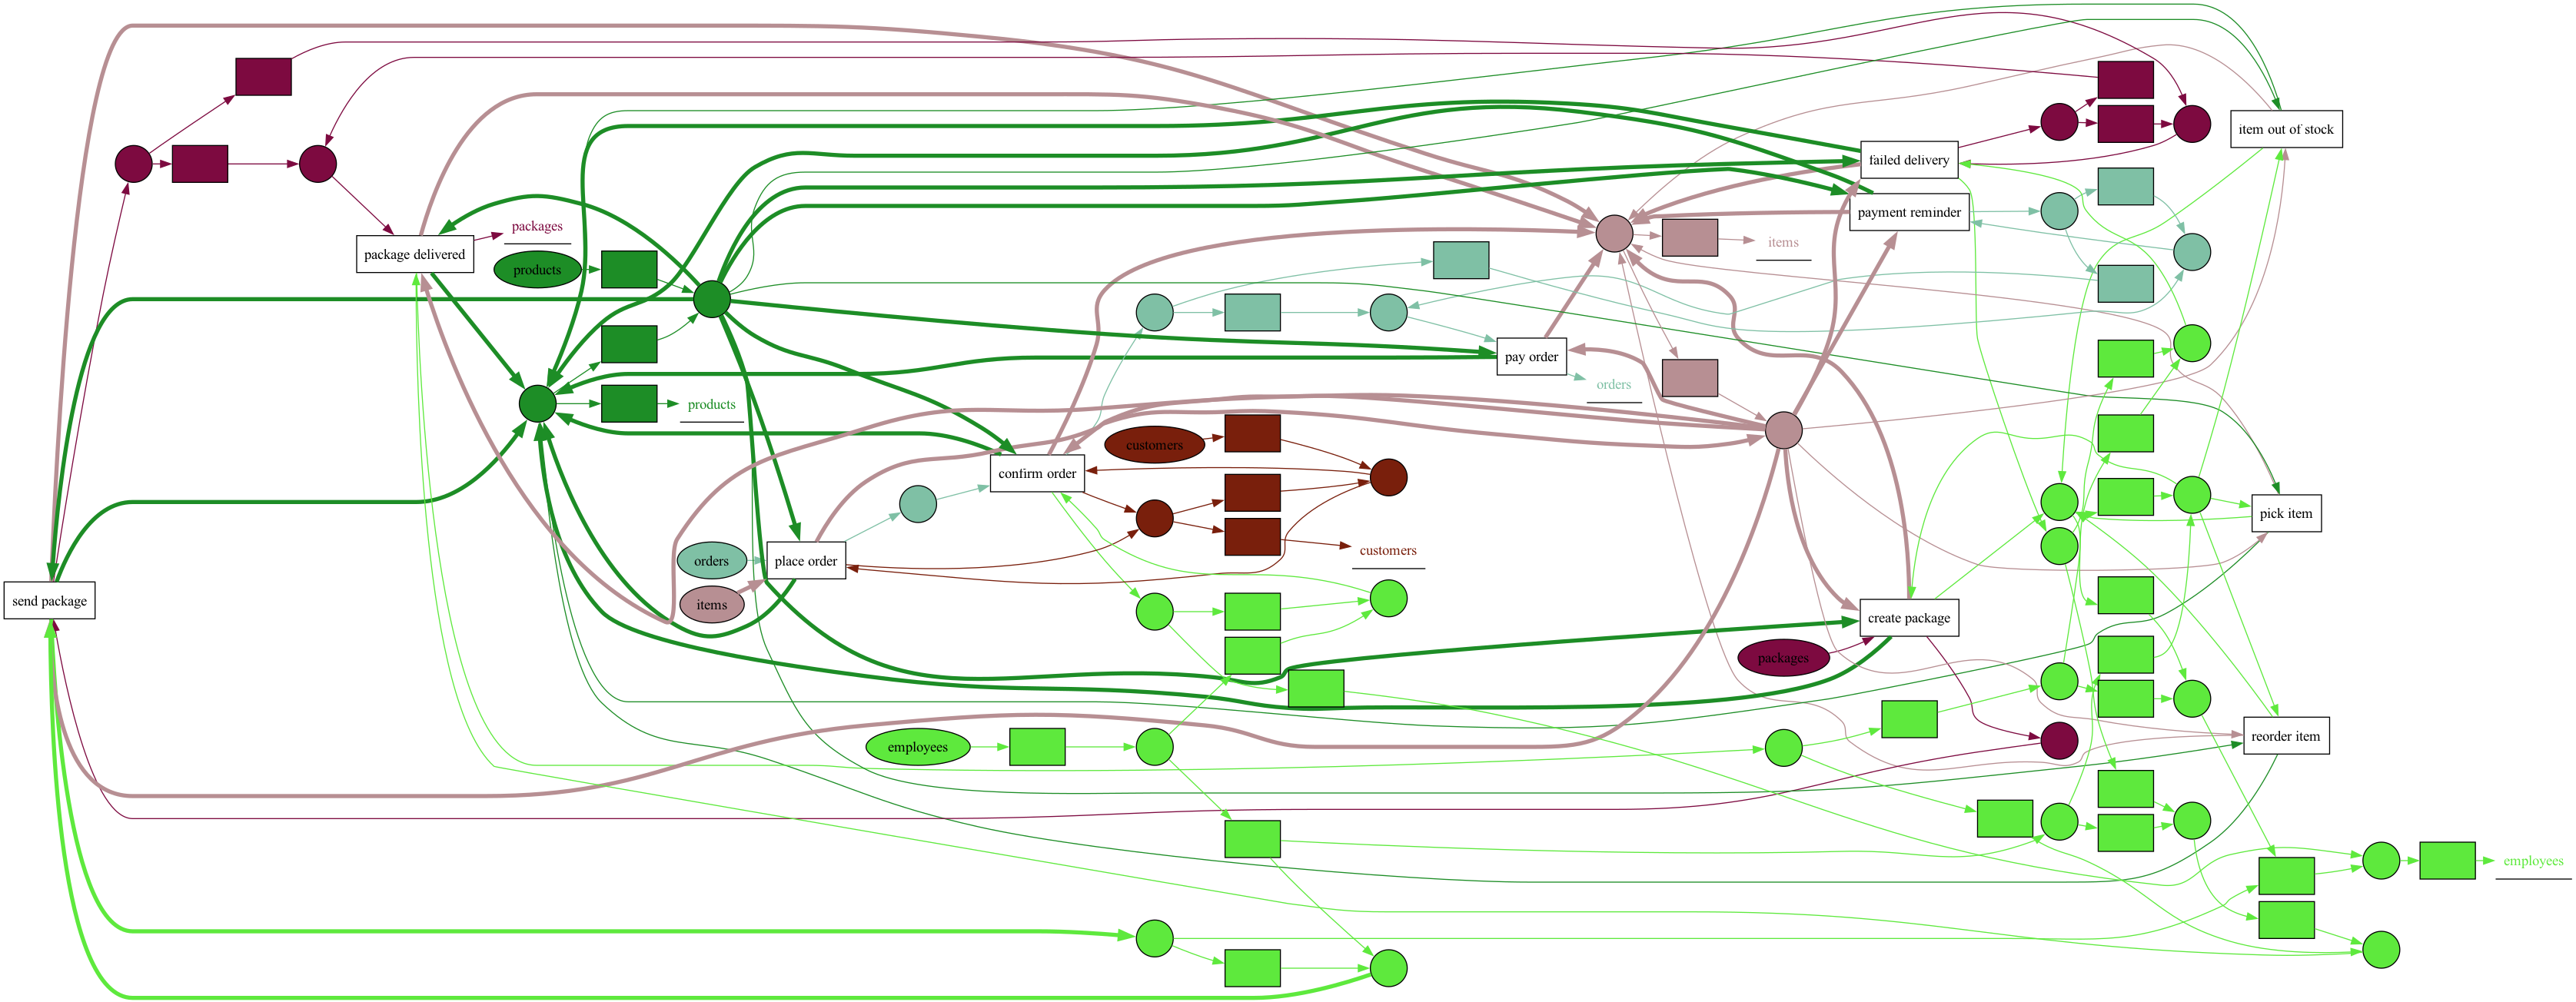

In [5]:
ocpn = pm4py.discover_oc_petri_net(ocel)
pm4py.view_ocpn(ocpn)

### Drill Down: Orders

In [6]:
event_log_orders = pm4py.ocel.ocel_flattening(ocel, "orders")

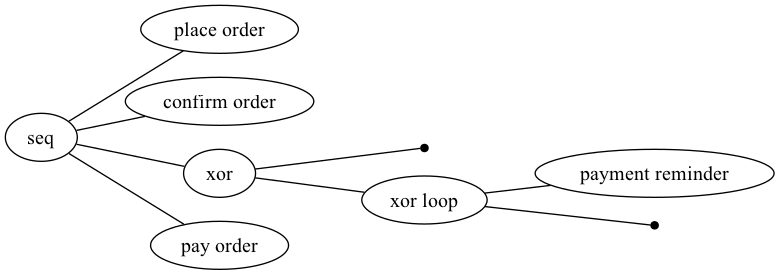

In [ ]:
process_tree = pm4py.discover_process_tree_inductive(event_log_orders)
pm4py.view_process_tree(process_tree)

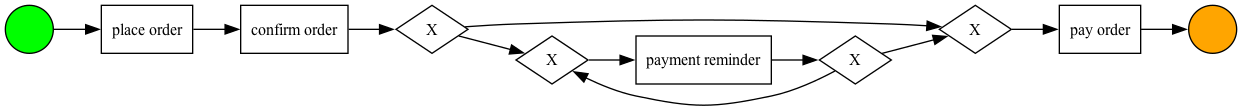

In [10]:
bpmn_model = pm4py.convert_to_bpmn(process_tree)
pm4py.view_bpmn(bpmn_model)